In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('predicted_labels.csv')
print("DataFrame...\n",data)
print("\nNumber of rows and column in our Data = ",data.shape)

DataFrame...
       Gender  Hemoglobin   MCH  MCHC   MCV  Result
0          0        15.2  29.9  33.4  89.3       0
1          0        11.9  31.0  32.5  95.4       1
2          0        17.2  31.1  34.3  90.5       0
3          0        12.9  28.0  34.0  82.1       0
4          1        14.5  30.6  33.0  92.8       0
...      ...         ...   ...   ...   ...     ...
8539       0        12.7  27.8  33.3  83.6       0
8540       0        14.9  29.3  32.9  88.9       0
8541       1        12.2  28.9  35.0  82.7       1
8542       1        12.2  29.2  32.8  89.1       1
8543       0        13.7  27.2  33.7  80.7       0

[8544 rows x 6 columns]

Number of rows and column in our Data =  (8544, 6)


In [8]:
data.head(8500)
data.isnull().sum()

Gender        0
Hemoglobin    0
MCH           0
MCHC          0
MCV           0
Result        0
dtype: int64

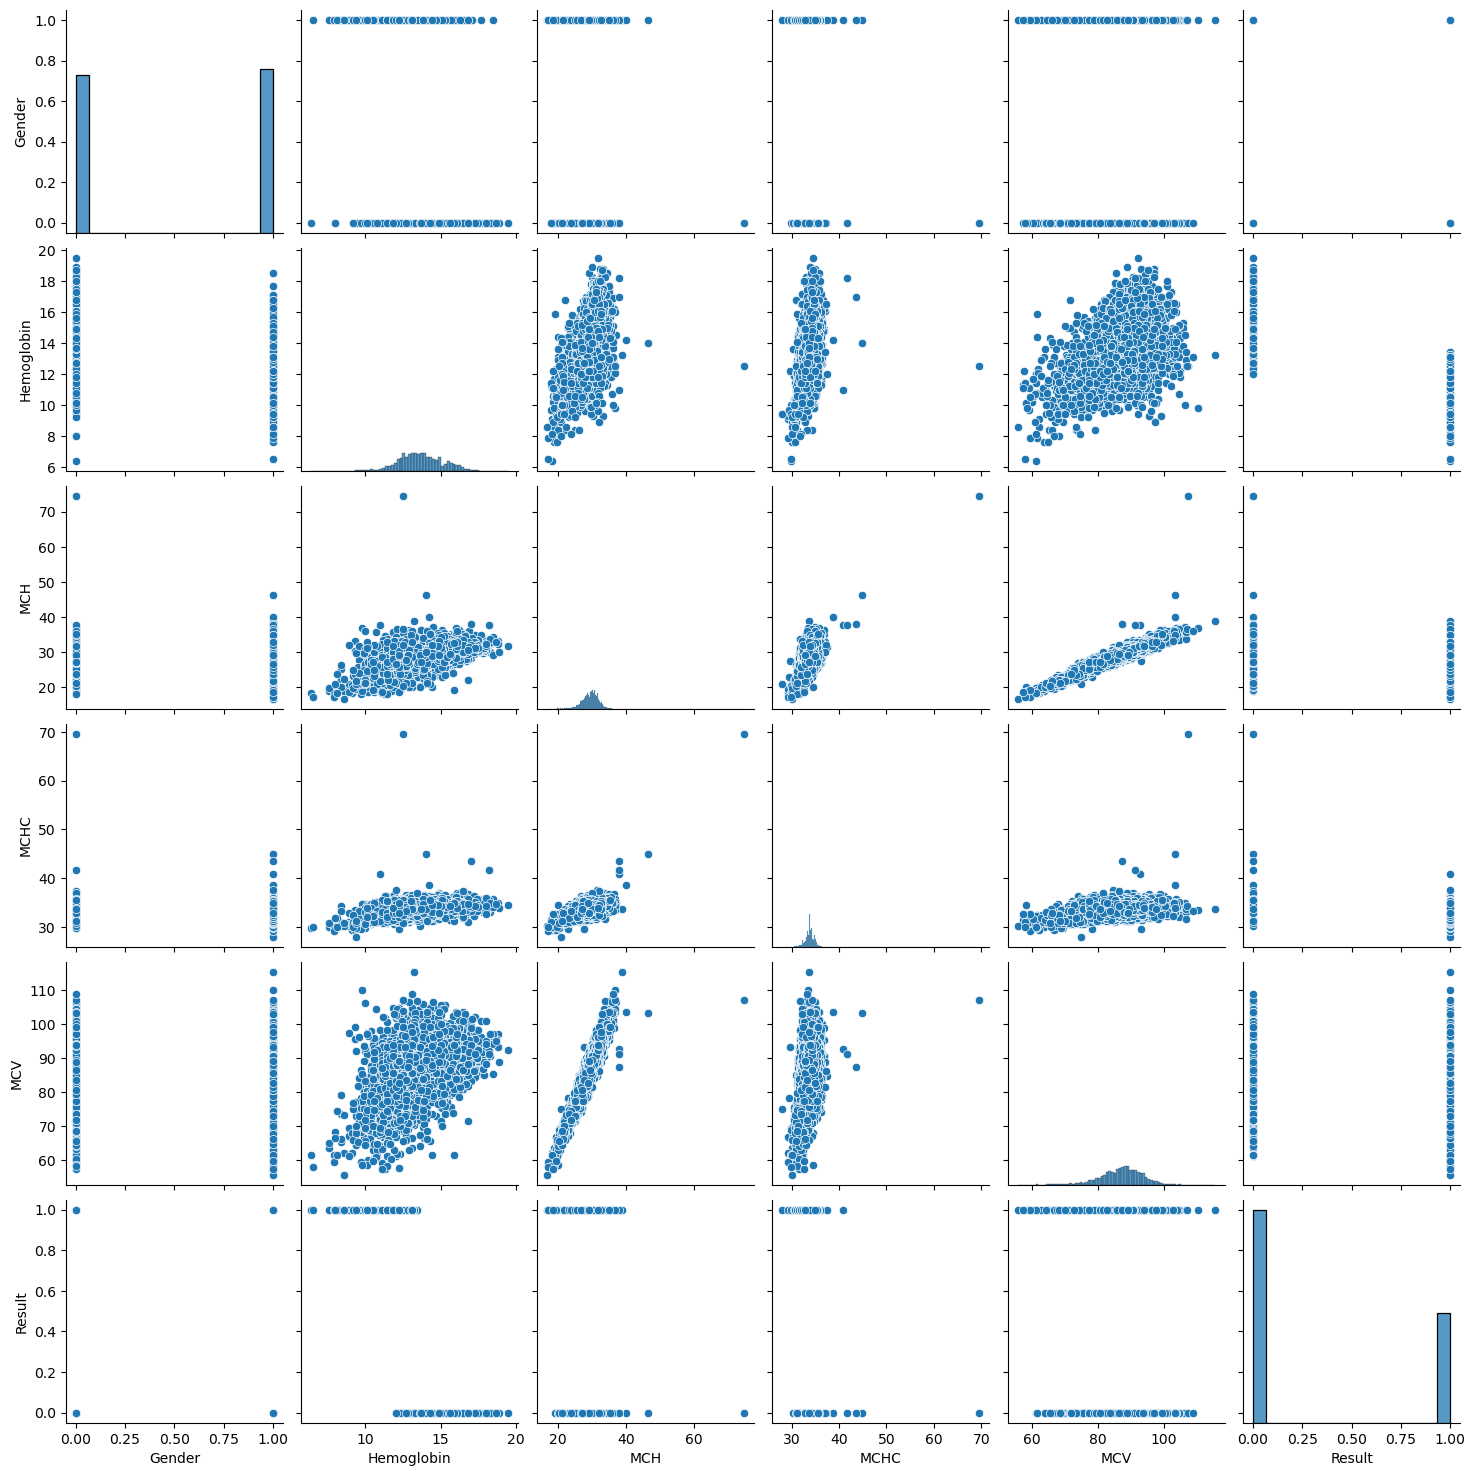

In [9]:
sns.pairplot(data)

In [10]:
data.corr()

,Gender,Hemoglobin,MCH,MCHC,MCV,Result
Gender,1.000000,-0.403684,-0.063804,-0.168659,-0.006650,0.572938
Hemoglobin,-0.403684,1.000000,0.490263,0.365046,0.432065,-0.678957
MCH,-0.063804,0.490263,1.000000,0.583706,0.937848,-0.298083
MCHC,-0.168659,0.365046,0.583706,1.000000,0.269868,-0.271632
MCV,-0.006650,0.432065,0.937848,0.269868,1.000000,-0.241609
Result,0.572938,-0.678957,-0.298083,-0.271632,-0.241609,1.000000


<Axes: >

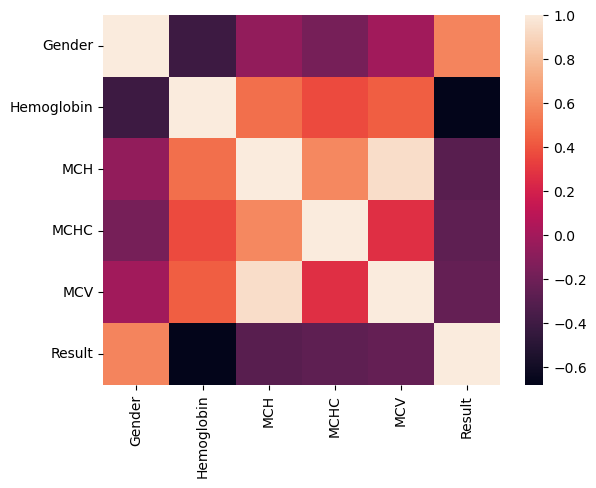

In [11]:
sns.heatmap(data.corr())

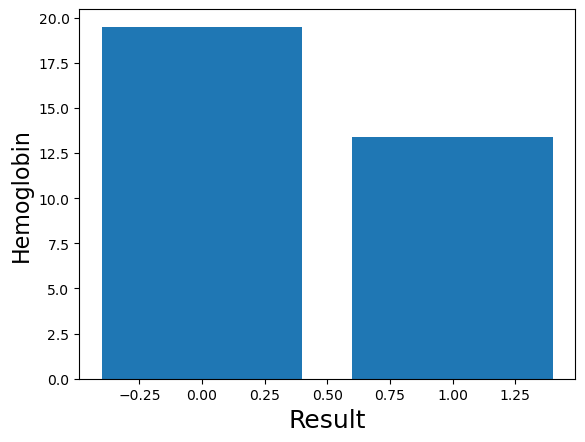

In [12]:
x=data['Result']
y=data['Hemoglobin']
plt.xlabel('Result',fontsize=18)
plt.ylabel('Hemoglobin',fontsize=16)
plt.bar(x,y)
plt.show()

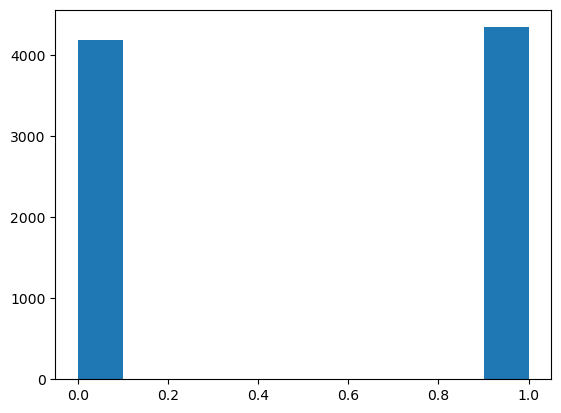

In [13]:
plt.hist(data['Gender'])
plt.show()

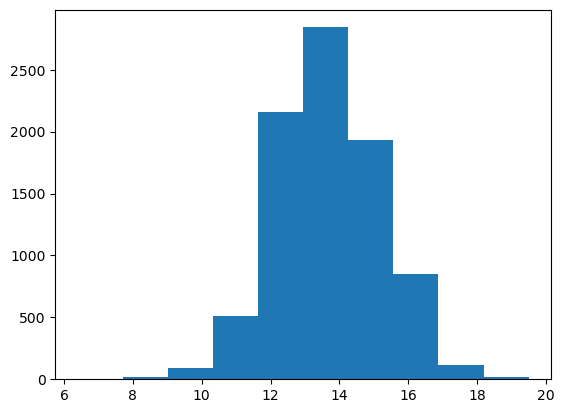

In [14]:
plt.hist(data['Hemoglobin'])
plt.show()

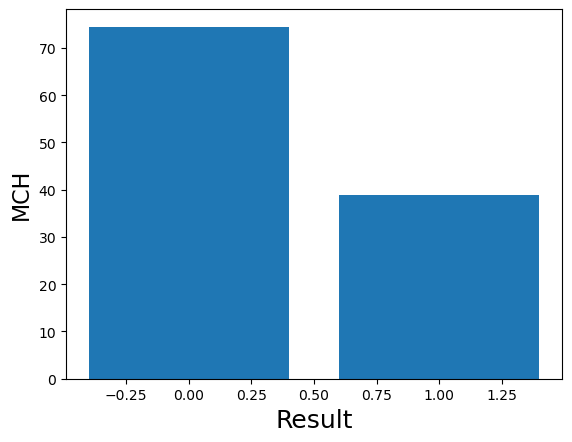

In [15]:
x=data['Result']
y=data['MCH']
plt.xlabel('Result',fontsize=18)
plt.ylabel('MCH',fontsize=16)
plt.bar(x,y)
plt.show()

In [16]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [18]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('predicted_labels.csv')
features=data.drop('Result',axis=1)
target=data['Result']
X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(6835, 5)
(1709, 5)
(6835,)
(1709,)


# RandomForest

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)
Y_pred = rf_classifier.predict(X_test)

accuracy = round(accuracy_score(Y_test, Y_pred)*100)
report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

print(confusion_matrix(Y_test, Y_pred))

Accuracy: 100.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1142
           1       1.00      1.00      1.00       567

    accuracy                           1.00      1709
   macro avg       1.00      1.00      1.00      1709
weighted avg       1.00      1.00      1.00      1709

[[1142    0]
 [   0  567]]


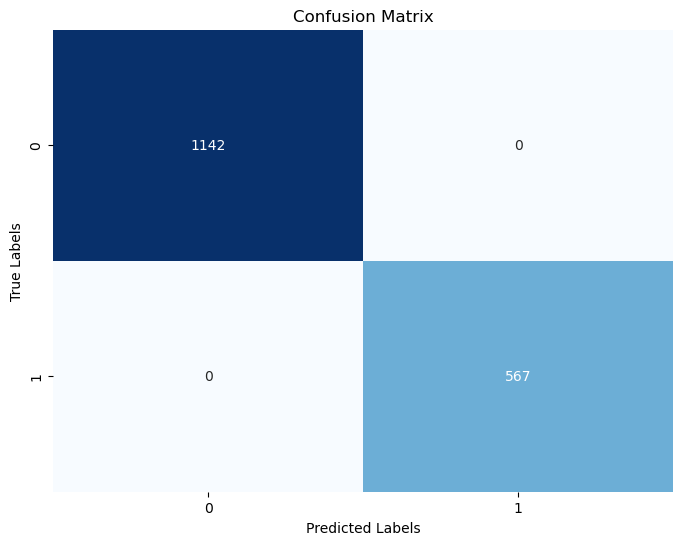

In [24]:
conf_matrix=confusion_matrix(Y_test,Y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import accuracy_score , confusion_matrix
model=DecisionTreeClassifier()
model.fit(X_train, Y_train)
print("test values that were inputted:\n")
print(X_train)
print("\n these are predictions for those corresponding inputs:\n")
prediction=model.predict(X_test)
print(prediction)

test values that were inputted:

      Gender  Hemoglobin   MCH  MCHC   MCV
756        0        11.3  24.8  32.6  76.1
2960       1        13.1  28.0  35.1  79.9
7988       1        12.7  25.7  32.1  80.0
7228       1        14.1  31.8  33.2  95.9
3382       0        15.7  30.7  34.8  88.1
...      ...         ...   ...   ...   ...
5734       0        12.6  26.6  32.4  82.2
5191       0        14.9  34.3  34.9  98.3
5390       1        14.3  30.0  35.6  84.4
860        0        11.4  29.0  33.4  86.9
7270       0        15.1  30.3  33.4  90.9

[6835 rows x 5 columns]

 these are predictions for those corresponding inputs:

[0 0 0 ... 1 0 0]


In [41]:
report = classification_report(Y_test,prediction)
print('Classification Report:')
print(report)
accuracy=round(accuracy_score(Y_test,prediction)*100)
print(f'Accuracy: {accuracy:.2f}')

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1142
           1       1.00      1.00      1.00       567

    accuracy                           1.00      1709
   macro avg       1.00      1.00      1.00      1709
weighted avg       1.00      1.00      1.00      1709

Accuracy: 100.00


In [32]:
print(confusion_matrix(Y_test,prediction))

[[1142    0]
 [   0  567]]


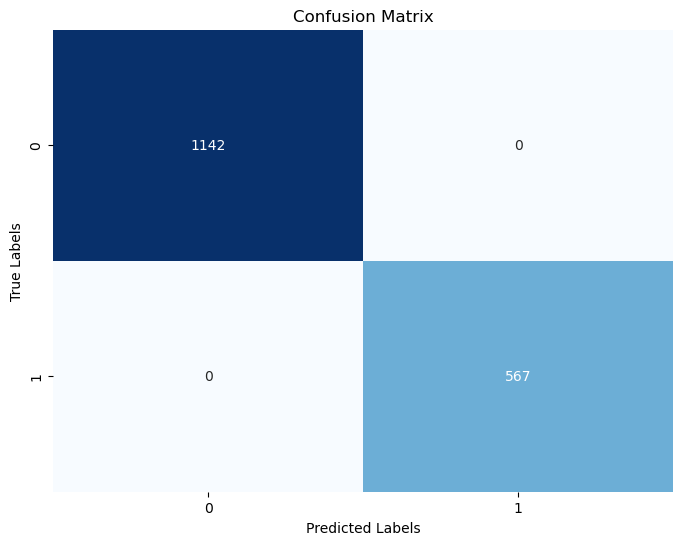

In [33]:
conf_matrix=confusion_matrix(Y_test,prediction)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()